### Algorithme des $k$-moyennes

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs


On donne la fonction suivante :

In [3]:
def generate(n,mx,sx,my,sy,alpha):
    X = np.random.randn(n*2).reshape((n,2))
    X = X*np.array([sx,sy])
    r = np.array([[np.cos(alpha), -np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]])
    X = X@r
    X = X+np.array([mx,my])
    return X

Interprétez son code. 

Testez-là en visualisant le nuage de points qu'elle produit en faisant varier ses paramètres.

Déduisez-en le rôle des paramètres.

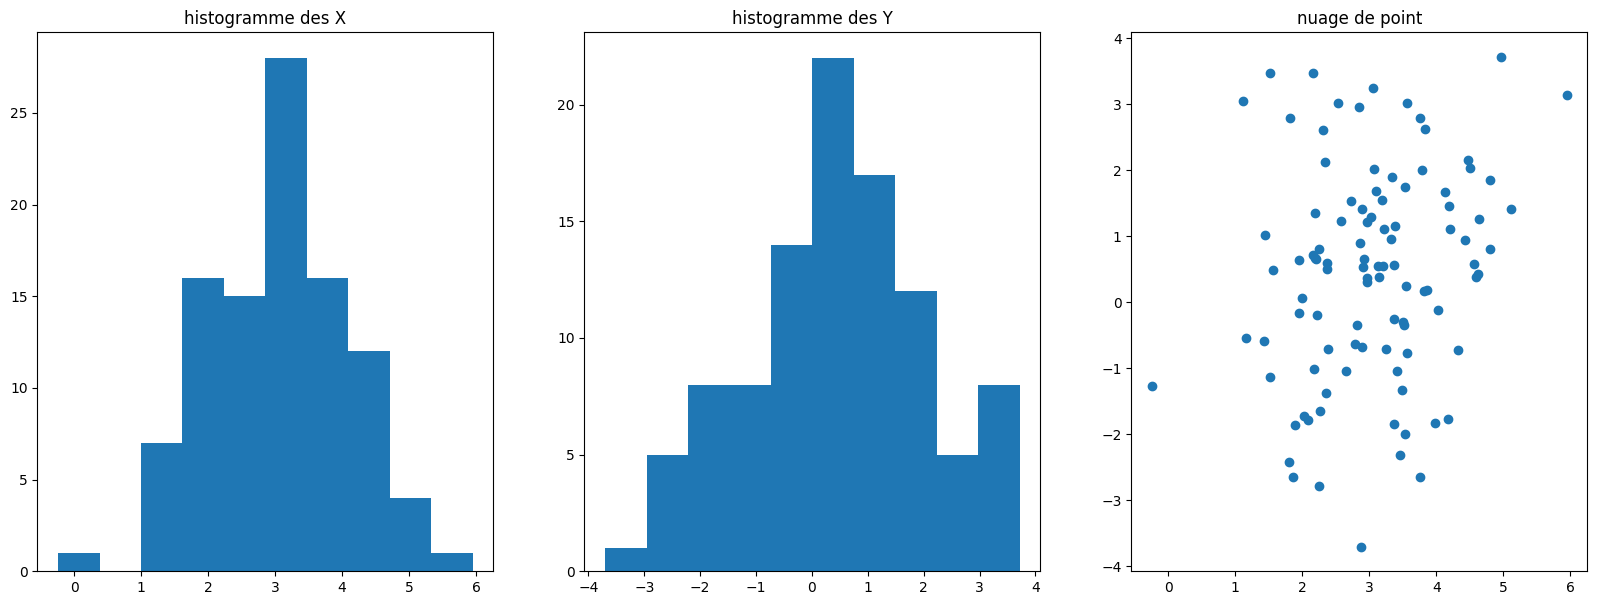

In [4]:
# Utilisez cette cellule pour tester l'exécution de la fonction generate
points = generate(100, 3, 1, .5, 1.5, 0)


plt.figure(figsize=(20, 7))
plt.subplot(131)
plt.title("histogramme des X")
plt.hist(x=points[:, 0])

plt.subplot(132)
plt.title("histogramme des Y")
plt.hist(x=points[:, 1])

plt.subplot(133)
plt.title("nuage de point")
plt.scatter(x=points[:,0], y=points[:,1])

Effet de l'angle

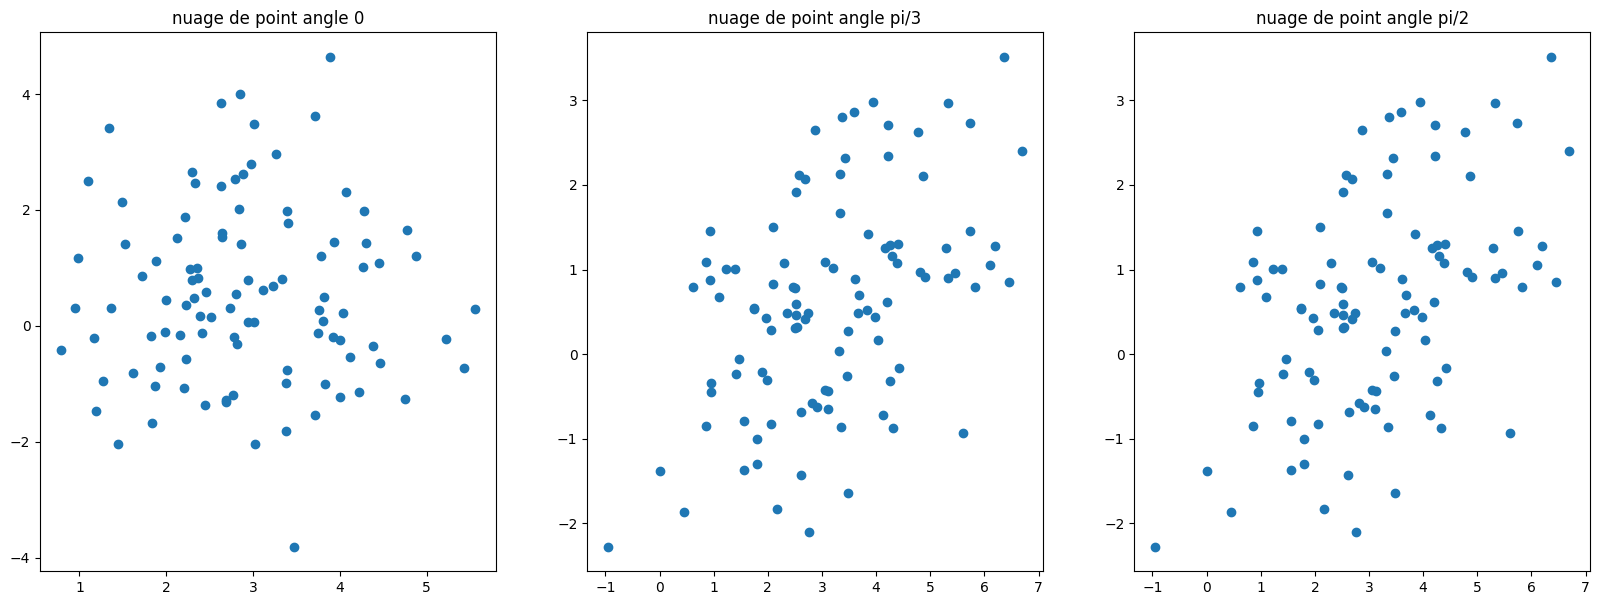

In [5]:


points_0 = generate(100, 3, 1, .5, 1.5, 0)
points_1 = generate(100, 3, 1, .5, 1.5, np.pi/3)

points_2 = generate(100, 3, 1, .5, 1.5, np.pi/2)

plt.figure(figsize=(20, 7))

plt.subplot(131)
plt.title("nuage de point angle 0")
plt.scatter(x=points_0[:,0], y=points_0[:,1])

plt.subplot(132)
plt.title("nuage de point angle pi/3" )
plt.scatter(x=points_1[:,0], y=points_1[:,1])

plt.subplot(133)
plt.title("nuage de point angle pi/2" )
plt.scatter(x=points_1[:,0], y=points_1[:,1])


Dans cette cellule, expliquez le fonctionnement de la fonction `generate` et indiquez la signification de ses paramètres.

## Constitution d'un jeu de données

In [6]:
X1 = generate(30,0,1.5,7,1,np.pi/3)
X2 = generate(30,-5,1,-4,.4,-np.pi/4)
X3 = generate(30,7,1,-1,.8,np.pi/4)

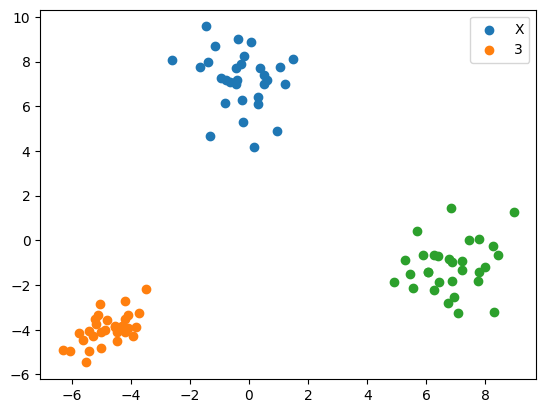

In [7]:
plt.figure()
plt.legend("X1")
plt.scatter(X1[:,0],X1[:,1])
plt.legend("X2")
plt.scatter(X2[:,0],X2[:,1])
plt.legend("X3")
plt.scatter(X3[:,0],X3[:,1])

Constituez un dataframe pandas disposant de deux colonnes 'x' et 'y' constitué des valeurs de `X1`, `X2` et `X3` dont l'ordre sera aléatoire.

Vous utiliserez les fonctions `numpy.concatenate` et `np.random.shuffle`

In [8]:
X = np.concatenate([X1, X2, X3])
np.random.shuffle(X)
print(X)

[[ 6.7712876  -0.81740533]
 [-5.41578695 -4.07094354]
 [ 0.37884742  7.70407089]
 [-5.73294508 -4.12736403]
 [ 1.22872699  6.99552801]
 [ 0.6116839   7.19588571]
 [-0.77683074  7.18862834]
 [ 6.06625175 -1.40959868]
 [-4.80131512 -3.56162018]
 [-5.40372002 -4.9387326 ]
 [ 6.87488048 -1.80256395]
 [-5.21217114 -3.52897066]
 [ 5.87855295 -0.67470741]
 [-0.3641187   9.01267028]
 [-0.4495126   6.98249694]
 [ 6.24317483 -2.22997106]
 [ 4.92097096 -1.85614169]
 [ 6.41016504 -0.68620779]
 [-5.00760957 -4.83114097]
 [ 7.76232586 -1.80487098]
 [ 6.24287393 -0.63347863]
 [ 7.08141208 -3.25352865]
 [ 0.52270562  7.00492367]
 [-5.28610343 -4.26072772]
 [-4.30713145 -3.8501718 ]
 [ 7.45449372  0.01291356]
 [ 5.4404235  -1.49169536]
 [ 7.7811013   0.06212111]
 [-0.15929767  8.26738384]
 [ 8.41634068 -0.64830253]
 [ 0.95895863  4.89531894]
 [-4.4752515  -4.11197496]
 [-4.47732992 -4.49925366]
 [ 0.51986691  7.40388797]
 [-1.44382148  9.57159356]
 [-0.65495114  7.10044817]
 [-0.19507966  5.29206609]
 

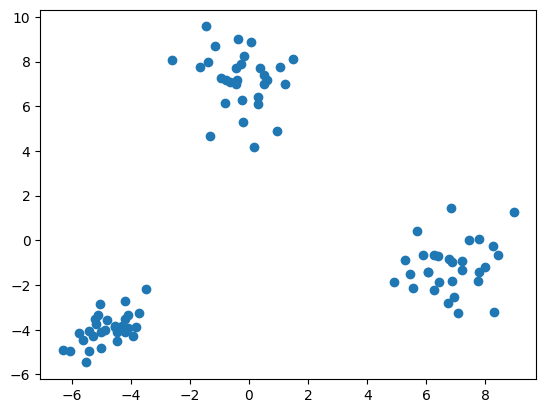

In [9]:
plt.scatter(X[:, 0], X[:, 1])

In [10]:
df = pd.DataFrame(data=X, columns=["X", "Y"])
df

,X,Y
0,6.771288,-0.817405
1,-5.415787,-4.070944
2,0.378847,7.704071
3,-5.732945,-4.127364
4,1.228727,6.995528
...,...,...
85,-4.085355,-3.911508
86,-3.475764,-2.180056
87,-4.198796,-2.730953
88,-4.092754,-3.359769


Ajoutez une colonne `cluster` à votre dataframe dont la valeur sera initialisée aléatoirement par un entier compris entre 0 inclus et k exclus, k étant un paramètre.

In [11]:
df["cluster"] = np.random.randint(0, 3, len(df))
df

,X,Y,cluster
0,6.771288,-0.817405,1
1,-5.415787,-4.070944,1
2,0.378847,7.704071,0
3,-5.732945,-4.127364,0
4,1.228727,6.995528,1
...,...,...,...
85,-4.085355,-3.911508,1
86,-3.475764,-2.180056,0
87,-4.198796,-2.730953,1
88,-4.092754,-3.359769,2


Générez le dictionnaire `means` dont les clés seront les valeurs de 0 à k exclus et dont les valeurs seront les moyennes des colonnes `x` et `y` pour les données du dataframe dont la valeur de `cluster` sera celle de la clé.

In [12]:
def compute_mean(df, feature=["X", "Y"], class_column="cluster"):
    mean_df = df.groupby(class_column).mean()
    means = {i : tuple(mean_df[feature].iloc[i]) for i in range(len(mean_df))}
    return means

means = compute_mean(df)
means

{0: (0.9349174312770754, 0.2569183038729751),
 1: (0.5450965915009957, 0.8376282476083154),
 2: (0.3411527835987506, 0.9608693545317603)}

Implantez une fonction calculant la distance euclidienne entre deux points

In [13]:

def dist(p1, p2):
    return np.sqrt(np.sum(p1-p2)**2)


Implantez une fonction qui pour un point donné, retourne la clé associée à la moyenne la plus proche

In [14]:
def get_near_mean(p, means, axis=1):
    distances = [dist(p , np.array(means[i])) for i in means]
    return np.argmin(distances)

Initialisez une nouvelle colonne `new_cluster` dont la valeur sera l'indice de la moyenne la plus proche pour chaque point.

In [15]:
df["new_cluster"] = df[["X", "Y"]].apply(get_near_mean, args=(means,), axis=1)
df

,X,Y,cluster,new_cluster
0,6.771288,-0.817405,1,1
1,-5.415787,-4.070944,1,0
2,0.378847,7.704071,0,1
3,-5.732945,-4.127364,0,0
4,1.228727,6.995528,1,1
...,...,...,...,...
85,-4.085355,-3.911508,1,0
86,-3.475764,-2.180056,0,0
87,-4.198796,-2.730953,1,0
88,-4.092754,-3.359769,2,0


In [16]:
df

,X,Y,cluster,new_cluster
0,6.771288,-0.817405,1,1
1,-5.415787,-4.070944,1,0
2,0.378847,7.704071,0,1
3,-5.732945,-4.127364,0,0
4,1.228727,6.995528,1,1
...,...,...,...,...
85,-4.085355,-3.911508,1,0
86,-3.475764,-2.180056,0,0
87,-4.198796,-2.730953,1,0
88,-4.092754,-3.359769,2,0


Finalement, implantez l'algorithme des $k$-moyennes en itérant tant que la colonne `new_cluster` est différente de la colonne `cluster`, cette dernière étant mise à jour à chaque itération.

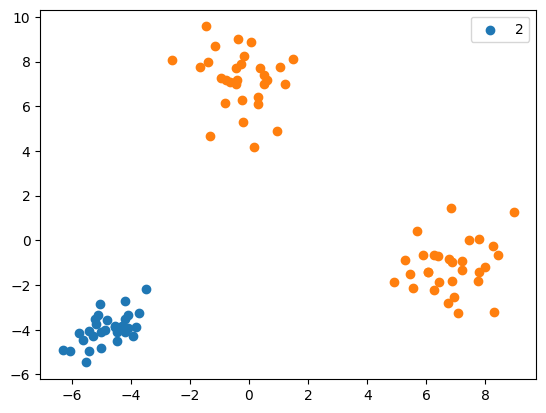

In [17]:
while (df["cluster"]-df["new_cluster"]).sum()!= 0:
    df["cluster"] = df["new_cluster"]
    means = compute_mean(df)
    df["new_cluster"] = df[["X", "Y"]].apply(get_near_mean, args=(means,), axis=1)

class0 = df[df["cluster"] == 0.0 ]
class1 = df[df["cluster"] == 1.0 ]
class2 = df[df["cluster"] == 2.0 ]

plt.figure()
plt.legend("0")
plt.scatter(class0["X"],class0["Y"])
plt.legend("1")
plt.scatter(class1["X"],class1["Y"])
plt.legend("2")
plt.scatter(class2["X"],class2["Y"])

Visualisez le partitionnement réalisé. 

Faites varier les valeurs de $k$.

Appliquez sur d'autres jeux de données que vous génèrerez.

In [18]:
def fit_kmean(df, k, feature=["X", "Y"], class_column = "cluster",new_class_column = "new_cluster"):
    
    df[class_column] = np.random.randint(0, k, len(df))
    means = compute_mean(df, feature)
    df[new_class_column] = df[feature].apply(get_near_mean,axis=1,   args=(means,) )
    
    while (df[class_column]-df[new_class_column]).sum()!= 0:
        df[class_column] = df[new_class_column]
        means = compute_mean(df, feature)
        df[new_class_column] = df[feature].apply(get_near_mean,axis=1,  args=(means, ))

   
    plt.figure()
    for i in range(k):
        cluster = df[df[class_column] ==  i][feature]
        cluster = cluster.to_numpy()
        plt.scatter(cluster[:, 0],cluster[:, 1], label=f"{i}")
    
    plt.legend() 

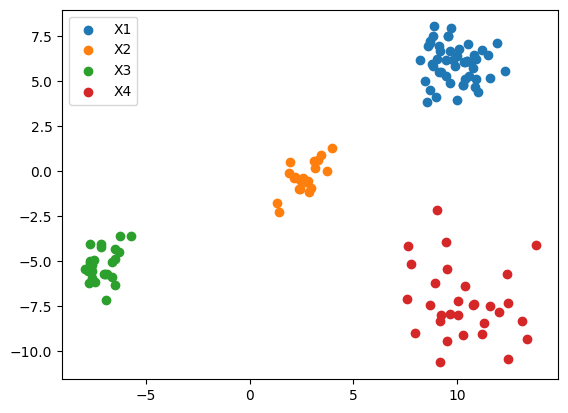

In [19]:
X1 = generate(50,10,1.5,6,1,np.pi/3)
X2 = generate(20,3 ,1.2,0,.4,-np.pi/4)
X3 = generate(25,-7,0.7,-5,.8,np.pi/4)
X4 = generate(30,10,1.7,-7,1.5,np.pi/4)

plt.figure()

plt.scatter(X1[:,0],X1[:,1], label="X1")
plt.scatter(X2[:,0],X2[:,1], label="X2")
plt.scatter(X3[:,0],X3[:,1], label="X3")
plt.scatter(X4[:,0],X4[:,1], label="X4")

plt.legend()

In [20]:
X = np.concatenate([X1, X2, X3, X4])


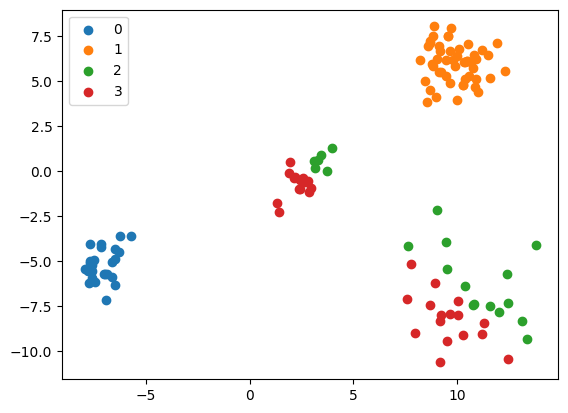

In [21]:
ndf = pd.DataFrame(data=X)

data_feature = ["Longueur", "Largeur"]
ndf.columns = data_feature

fit_kmean(ndf,4, feature=data_feature)

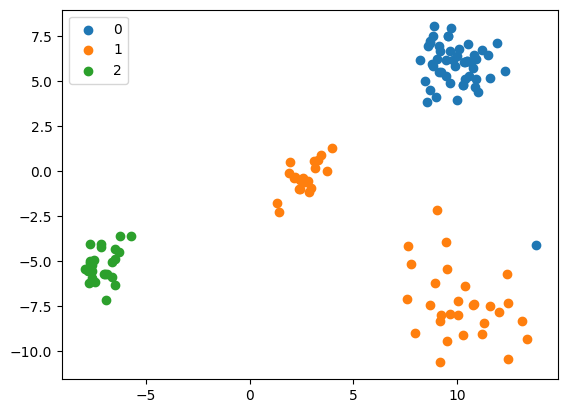

In [22]:
ndf = pd.DataFrame(data=X)

data_feature = ["Longueur", "Largeur"]
ndf.columns = data_feature

fit_kmean(ndf,3, feature=data_feature)

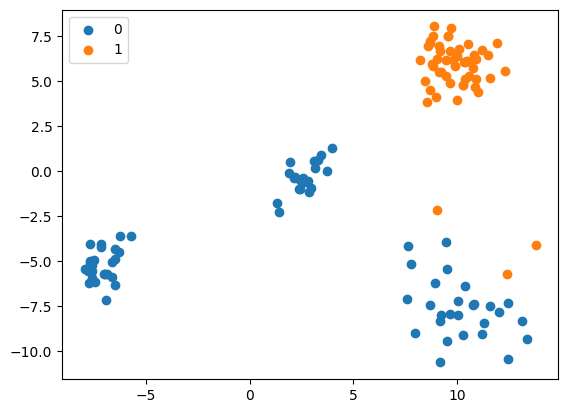

In [23]:
ndf = pd.DataFrame(data=X)

data_feature = ["Longueur", "Largeur"]
ndf.columns = data_feature

fit_kmean(ndf, 2, feature=data_feature)

Définissez une fonction qui calcule la somme des distances intra-clusters.

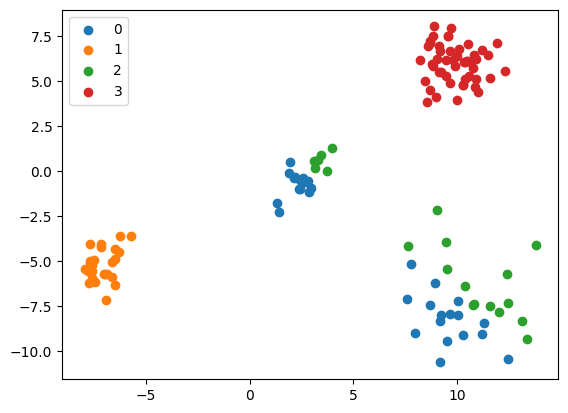

In [24]:
import itertools

def intra_cluster_distance(df, feature_column, cluster_column):
    clusters = df[cluster_column].unique()
    distances_sum = {}
    for cluster in clusters:
        df_cluster = df[feature_column][df[cluster_column] == cluster]

        feature = df_cluster[feature_column].to_numpy()
        comb = list(itertools.combinations(feature, 2))
        comarr = np.array([ np.array(uplet) for uplet in comb])

        distances_sum[cluster] = np.sum([dist(*comarr[i, :, :]) for i in range(comarr.shape[0])])
    return distances_sum



ndf = pd.DataFrame(data=X)

data_feature = ["Longueur", "Largeur"]
ndf.columns = data_feature


fit_kmean(ndf,4, feature=data_feature)


## Fonction k-means complet et un petit Supplement 😉 

calcule les centroides des classes et affiche le nuage de cluster si les points sont de dimension inferieurs ou egale à 3


### Cluster a 3 dimension

In [132]:
def fit_kmean(df, classes_nb, feature=["X", "Y"], class_column = "cluster",new_class_column = "new_cluster"):
    
    assert len(feature) > 1
    df[class_column] = np.random.randint(0, classes_nb, len(df))
    means = compute_mean(df, feature)
    df[new_class_column] = df[feature].apply(get_near_mean,axis=1,   args=(means,) )
    
    while (df[class_column]-df[new_class_column]).sum()!= 0:
        df[class_column] = df[new_class_column]
        means = compute_mean(df, feature)
        df[new_class_column] = df[feature].apply(get_near_mean,axis=1,  args=(means, ))
    
    
    fig, axes = plt.subplots()
    if len(feature) == 3:
        axes = fig.add_subplot(projection="3d")
    for classe in range(classes_nb):
        cluster = df[df[class_column] ==  classe][feature]
        cluster_array = cluster.to_numpy()
        if len(feature) == 2:
            axes.scatter(*tuple(feature), data=cluster[feature], label=f"{classe}")
        elif len(feature) == 3:
            markers = list(plt.Line2D.markers.keys())
            axes.scatter(*tuple(feature), data=cluster[feature], label=f"{classe}", marker=markers[classe])
        # plt.scatter(cluster[:, 0],cluster[:, 1], label=f"{classe}")
    
    plt.legend() 
    plt.show()
    print("centroïdes")
    for centroid in means:
        print("\t", centroid," : ", means[centroid])



generation des données à 3 dimension  avec  make_blobs

In [127]:
X, Y = make_blobs(200, centers= [[-10, 0, 10]], cluster_std=[[1, 1.5, .5]], shuffle=True)

feature = ["X", "Y", "Z"]

df_3d = pd.DataFrame(data=X, columns=feature)

K-means à 3  dimension et 5 centroids

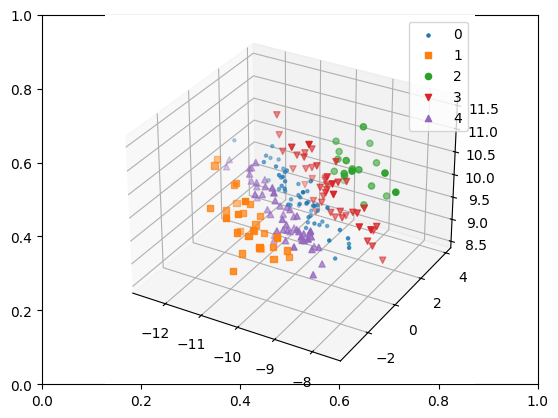

centroïdes
	 0  :  (-9.87657513028916, 0.038909903905711, 10.064277674489341)
	 1  :  (-10.507631267109376, -1.908425943681617, 9.895608313745955)
	 2  :  (-9.200781820563295, 2.4309531990298026, 10.215724717092924)
	 3  :  (-9.497978030563992, 1.0612127451204174, 10.06259431798451)
	 4  :  (-10.11720827350284, -0.6380385346808283, 9.822114179166167)


In [128]:
fit_kmean(df_3d, 5, feature=feature)

K-means à 3  dimension et 3 centroids

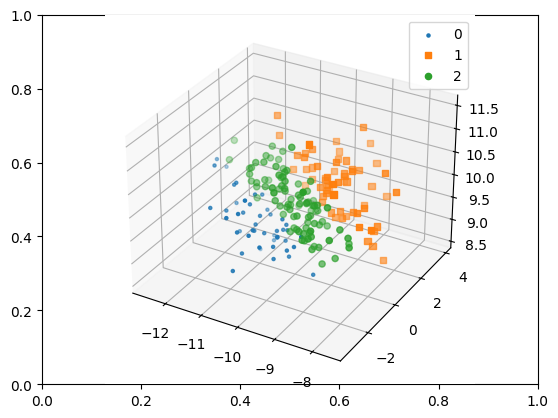

centroïdes
	 0  :  (-10.38032507853228, -1.5507400240097362, 9.820525796060307)
	 1  :  (-9.354344460874344, 1.4699583013156965, 10.108558150318364)
	 2  :  (-9.982832105519213, -0.12466067877247307, 9.99748586879688)


In [129]:
fit_kmean(df_3d, 3, feature=feature)

K-means à 3 dimension et 2 centroids

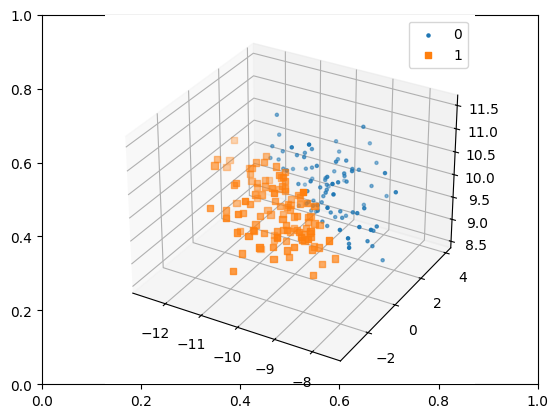

centroïdes
	 0  :  (-9.486118201041501, 1.17967347295986, 10.070183042992387)
	 1  :  (-10.18845055538223, -0.8524703079500882, 9.929173072182996)


In [130]:

fit_kmean(df_3d, 2, feature=feature)

K-means à 2 dimension et 3 centroids

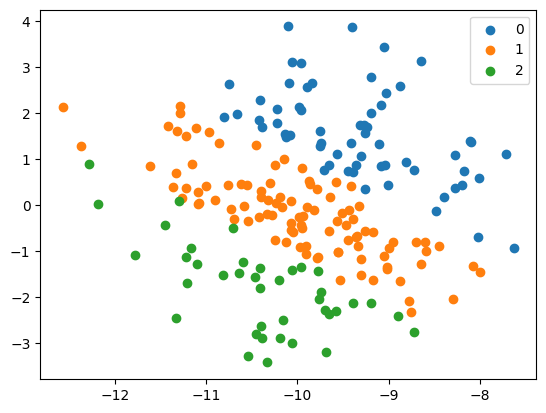

centroïdes
	 0  :  (-9.329860406527978, 1.5548913853188544)
	 1  :  (-10.008997370170453, -0.16312370790819186)
	 2  :  (-10.406760053313077, -1.8000362200916191)


In [133]:
fit_kmean(df_3d, 3, feature=["X", "Y"])